In [23]:
import sys
sys.path.append("../lib/python3.7/site-packages/")

import matplotlib.pyplot as plt

In [24]:
def plot_coherence (x, y, title):
    plt.figure(figsize=(15, 9))

    plt.plot(x, y)

    for a,b in zip(x, y):
        plt.annotate('(%s, %.6f)' % (a,b), xy=(a,b), textcoords='data')

    plt.title(title)

    plt.ylabel("cv_coherence")
    plt.xlabel("number of topics")
    plt.show()

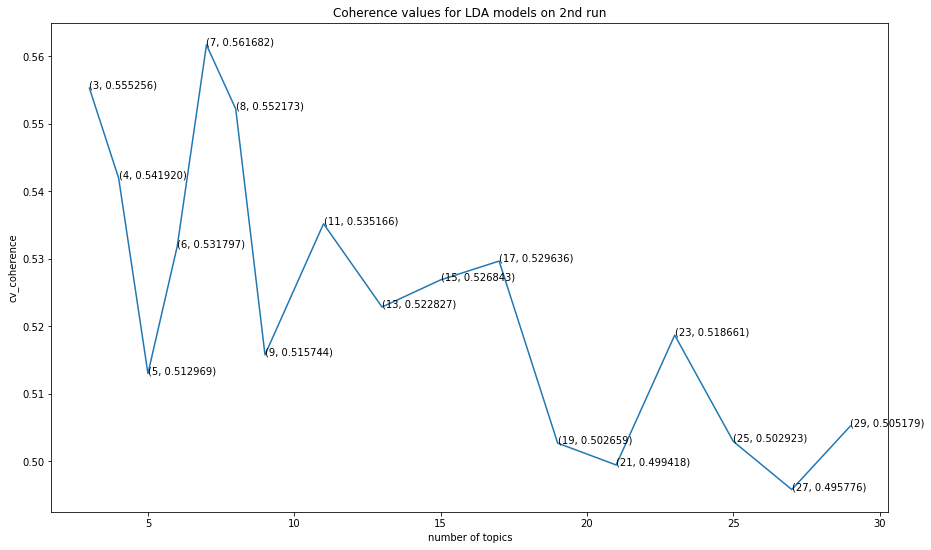

In [28]:
# Plot old LDA Coherence(cv) values
# run2: 11-29; run3: 3-8
old_y = list()
old_x = list()

# Read the inputs
with open("../data-out/lda_cv_3_9.txt", "r") as inf:
    for line in inf:
        line = line.strip('\n')
        old_y.append(float(line.split(" ")[1]))
        old_x.append(int(line.split(" ")[0]))
with open("../data-out/lda_cv_11_29.txt", "r") as inf:
    for line in inf:
        line = line.strip('\n')
        old_y.append(float(line.split(" ")[1]))
        old_x.append(int(line.split(" ")[0]))

# Set the title for this plot
title = 'Coherence values for LDA models on 2nd run'

plot_coherence(old_x, old_y, title)

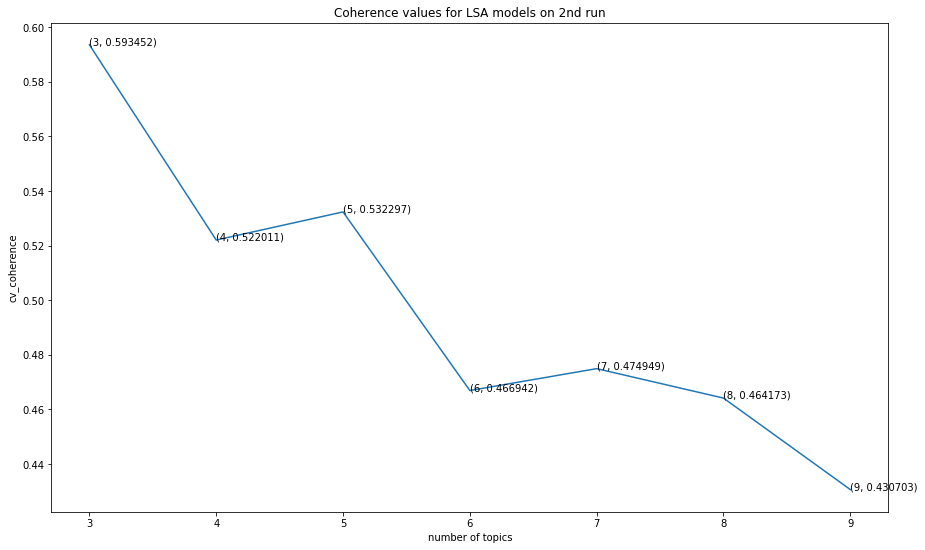

In [29]:
# Plot old LSA coherence values
# run3: 3-8
old_y = list()
old_x = list()

# Read the inputs
with open("../data-out/lsa_cv_3_9.txt", "r") as inf:
    for line in inf:
        line = line.strip('\n')
        old_y.append(float(line.split(" ")[1]))
        old_x.append(int(line.split(" ")[0]))

# Set the title for this plot
title = 'Coherence values for LSA models on 2nd run'

plot_coherence(old_x, old_y, title)